In [1]:
#libraries
import os
import cv2
import numpy as np

In [2]:
import pandas as pd

In [3]:
# Function to draw a box around a centroid on an image and return the coordinates
def bonding_box(centroid):
    # Calculate the top-left and bottom-right coordinates of the box
    # top_left = (int(centroid[0] - box_size[0] / 2), int(centroid[1] - box_size[1] / 2))
    # bottom_right = (int(centroid[0] + box_size[0] / 2), int(centroid[1] + box_size[1] / 2))
    top_left = [int(centroid[0]) - 18, int(centroid[1])-35]
    bottom_right = [int(centroid[0] + 18), int(centroid[1] + 45)]
    if bottom_right[0] > 95:
        bottom_right[0]=95
    if bottom_right[1] > 95:
        bottom_right[1]=95
    if top_left[0] <0:
        top_left[0] = 0
    if top_left[1]<0 :
       top_left[1] = 0
    return top_left, bottom_right

In [4]:
# def bonding_box(centroid):
#     # Calculate the top-left and bottom-right coordinates of the box
#     # top_left = (int(centroid[0] - box_size[0] / 2), int(centroid[1] - box_size[1] / 2))
#     # bottom_right = (int(centroid[0] + box_size[0] / 2), int(centroid[1] + box_size[1] / 2))
#     top_left = [int(centroid[0]) - 20, int(centroid[1])-55]
#     bottom_right = [int(centroid[0] + 20), int(centroid[1] + 55)]
#     if bottom_right[0] > 120:
#         bottom_right[0]=120
#     if bottom_right[1] > 120:
#         bottom_right[1]=120
#     if top_left[0] <0:
#         top_left[0] = 0
#     if top_left[1]<0 :
#        top_left[1] = 0
#     return top_left, bottom_right

In [5]:
# def bonding_box(centroid):
#     # Calculate the top-left and bottom-right coordinates of the box
#     # top_left = (int(centroid[0] - box_size[0] / 2), int(centroid[1] - box_size[1] / 2))
#     # bottom_right = (int(centroid[0] + box_size[0] / 2), int(centroid[1] + box_size[1] / 2))
#     top_left = [int(centroid[0]) - 20, int(centroid[1])-75]
#     bottom_right = [int(centroid[0] + 20), int(centroid[1] + 75)]
#     if bottom_right[0] > 160:
#         bottom_right[0]=160
#     if bottom_right[1] > 160:
#         bottom_right[1]=160
#     if top_left[0] <0:
#         top_left[0] = 0
#     if top_left[1]<0 :
#        top_left[1] = 0
#     return top_left, bottom_right

In [6]:
df = pd.read_excel("/content/ondevice_normal.xlsx")

In [7]:
df['confidence_score'] = df['confidence_score'].fillna(0)

In [8]:
df = df.fillna("[0,0]")

In [9]:
import ast

In [10]:
df["p_centriod"] = df["p_centriod"].apply(ast.literal_eval)

In [11]:
p_left_top = []
p_right_bottom = []

In [12]:
for index, row in df.iterrows():
  if(row["p_human"]==1):
    # print(row["p_centriod"])
    top_left, bottom_right = bonding_box(row["p_centriod"])
    p_right_bottom.append(bottom_right)
    p_left_top.append(top_left)
  else:
    p_right_bottom.append([0,0])
    p_left_top.append([0,0])

In [13]:
df["p_left_top"] = p_left_top
df["p_right_bottom"] = p_right_bottom

In [14]:
df["g_left_top"] = df["g_left_top"].apply(ast.literal_eval)
df["g_right_bottom"] = df["g_right_bottom"].apply(ast.literal_eval)

In [15]:
pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 5.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [16]:
import torch
from torchmetrics.detection import IntersectionOverUnion

In [17]:
iou = []

In [18]:
for index, row in df.iterrows():
  if(row["g_human"]==1) & (row["p_human"]==1):
    preds = [
    {
        "boxes": torch.tensor([
              [row["g_left_top"][0] , row["g_left_top"][1], row["g_right_bottom"][0], row["g_right_bottom"][1]]]),
        "labels": torch.tensor([1]),
    }
    ]
    target = [
      {
          "boxes": torch.tensor([ [row["p_left_top"][0] , row["p_left_top"][1], row["p_right_bottom"][0], row["p_right_bottom"][1]]]),
          "labels": torch.tensor([1]),
      }
     ]
    metric = IntersectionOverUnion()
    iou_value = metric(preds, target)
    iou.append(iou_value['iou'])
  else:
    iou.append(0)

In [19]:
df['IOU'] = iou

In [20]:
# df.to_csv("device_normal_casev89.csv")

In [21]:
df_sorted = df.sort_values(by='confidence_score', ascending=False)

In [22]:
preds =0
golds = 0

In [23]:
preds = df_sorted["p_human"].sum()
golds = df_sorted["g_human"].sum()

In [24]:
tps = []
fps = []

In [25]:
for index, row in df_sorted.iterrows():
    #print(row['ground_truth'], row['predicted'])
    if (row['IOU']>0.1):
      tps.append(1)
      fps.append(0)
    else:
      tps.append(0)
      fps.append(1)

In [26]:
df_sorted["tps"] = tps
df_sorted["fps"] = fps

In [27]:
cumulative_fps = df_sorted["fps"].cumsum()
cumulative_tps = df_sorted["tps"].cumsum()

In [28]:
recalls_01 = np.divide(cumulative_tps, golds)
precisions_01 = np.divide(cumulative_tps, (cumulative_fps + cumulative_tps))

In [29]:
def compute_ap(recall, precision):
    """ Compute the average precision, given the recall and precision curves.
    Code originally from https://github.com/rbgirshick/py-faster-rcnn.

    # Arguments
        recall:    The recall curve (list).
        precision: The precision curve (list).
    # Returns
        The average precision as computed in py-faster-rcnn.
    """
    # correct AP calculation
    # first append sentinel values at the end
    mrec = np.concatenate(([0.0], recall, [1.0]))
    mpre = np.concatenate(([0.0], precision, [0.0]))

    # compute the precision envelope
    for i in range(mpre.size - 1, 0, -1):
        mpre[i - 1] = np.maximum(mpre[i - 1], mpre[i])

    # to calculate area under PR curve, look for points
    # where X axis (recall) changes value
    i = np.where(mrec[1:] != mrec[:-1])[0]

    # and sum (\Delta recall) * prec
    ap = np.sum((mrec[i + 1] - mrec[i]) * mpre[i + 1])
    return ap

In [30]:
decreasing_max_precision_01 = np.maximum.accumulate(precisions_01[::-1])[::-1]

In [31]:
ap01 = compute_ap(recalls_01, decreasing_max_precision_01)

In [32]:
tps_025 = []
fps_025 = []

In [33]:
for index, row in df_sorted.iterrows():
    #print(row['ground_truth'], row['predicted'])
    if (row['IOU']>0.25):
      tps_025.append(1)
      fps_025.append(0)
    else:
      tps_025.append(0)
      fps_025.append(1)

In [34]:
df_sorted["tps_025"] = tps_025
df_sorted["fps_025"] = fps_025

In [35]:
cumulative_fps_025 = df_sorted["fps_025"].cumsum()
cumulative_tps_025 = df_sorted["tps_025"].cumsum()

In [36]:
recalls_025 = np.divide(cumulative_tps_025, golds)
precisions_025 = np.divide(cumulative_tps_025, (cumulative_fps_025 + cumulative_tps_025))

In [37]:
decreasing_max_precision_025 = np.maximum.accumulate(precisions_025[::-1])[::-1]

In [38]:
ap025 = compute_ap(recalls_025, decreasing_max_precision_025)

In [39]:
tps_05 = []
fps_05 = []

In [40]:
for index, row in df_sorted.iterrows():
    #print(row['ground_truth'], row['predicted'])
    if (row['IOU']>0.5):
      tps_05.append(1)
      fps_05.append(0)
    else:
      tps_05.append(0)
      fps_05.append(1)

In [41]:
df_sorted["tps_05"] = tps_05
df_sorted["fps_05"] = fps_05

In [42]:
cumulative_fps_05 = df_sorted["fps_05"].cumsum()
cumulative_tps_05 = df_sorted["tps_05"].cumsum()

In [43]:
recalls_05 = np.divide(cumulative_tps_05, golds)
precisions_05 = np.divide(cumulative_tps_05, (cumulative_fps_05 + cumulative_tps_05))

In [44]:
decreasing_max_precision_05 = np.maximum.accumulate(precisions_05[::-1])[::-1]

In [45]:
ap05 = compute_ap(recalls_05, decreasing_max_precision_05)

with a detection model where you have per-image precision and recall values instead of binary labels,need to calculate the F1 score manually

In [46]:
import numpy as np

# Step 1: Calculate F1 score for each image
f1_scores_01 = [2 * (precisions_01 * recalls_01) / (precisions_01 + recalls_01) if (precisions_01 + recalls_01) != 0 else 0 for precisions_01, recalls_01 in zip(precisions_01, recalls_01)]

# Step 2: Average F1 scores across all images
overall_f1_score_01 = np.mean(f1_scores_01)

print("Overall F1 Score for IOU 0.1:", overall_f1_score_01)


Overall F1 Score for IOU 0.1: 0.5373199660713517


In [47]:
# Step 1: Calculate F1 score for each image
f1_scores_025 = [2 * (precisions_025 * recalls_025) / (precisions_025 + recalls_025) if (precisions_025 + recalls_025) != 0 else 0 for precisions_025, recalls_025 in zip(precisions_025, recalls_025)]

# Step 2: Average F1 scores across all images
overall_f1_score_025 = np.mean(f1_scores_025)

print("Overall F1 Score for IOU 0.25:", overall_f1_score_025)

Overall F1 Score for IOU 0.25: 0.4268218647232168


In [48]:
# Step 1: Calculate F1 score for each image
f1_scores_05 = [2 * (precisions_05 * recalls_05) / (precisions_05 + recalls_05) if (precisions_05 + recalls_05) != 0 else 0 for precisions_05, recalls_05 in zip(precisions_05, recalls_05)]

# Step 2: Average F1 scores across all images
overall_f1_score_05 = np.mean(f1_scores_05)

print("Overall F1 Score for IOU 0.5:", overall_f1_score_05)

Overall F1 Score for IOU 0.5: 0.217463988613805


<ipython-input-49-a182c365dca4>:5: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-r" (-> linestyle='-'). The keyword argument will take precedence.
  plt.step(recalls_05, decreasing_max_precision_05, '-r',linestyle='--', label=f"Interpolated precision for IOU>0.5: {round(ap05, 3)}")
<ipython-input-49-a182c365dca4>:7: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-g" (-> linestyle='-'). The keyword argument will take precedence.
  plt.step(recalls_025, decreasing_max_precision_025,  '-g',linestyle='--', label=f"Interpolated precision for IOU>0.25: {round(ap025, 3)}")
<ipython-input-49-a182c365dca4>:9: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-b" (-> linestyle='-'). The keyword argument will take precedence.
  plt.step(recalls_01, decreasing_max_precision_01, '-b', linestyle='--',label=f"Interpolated precision for IOU

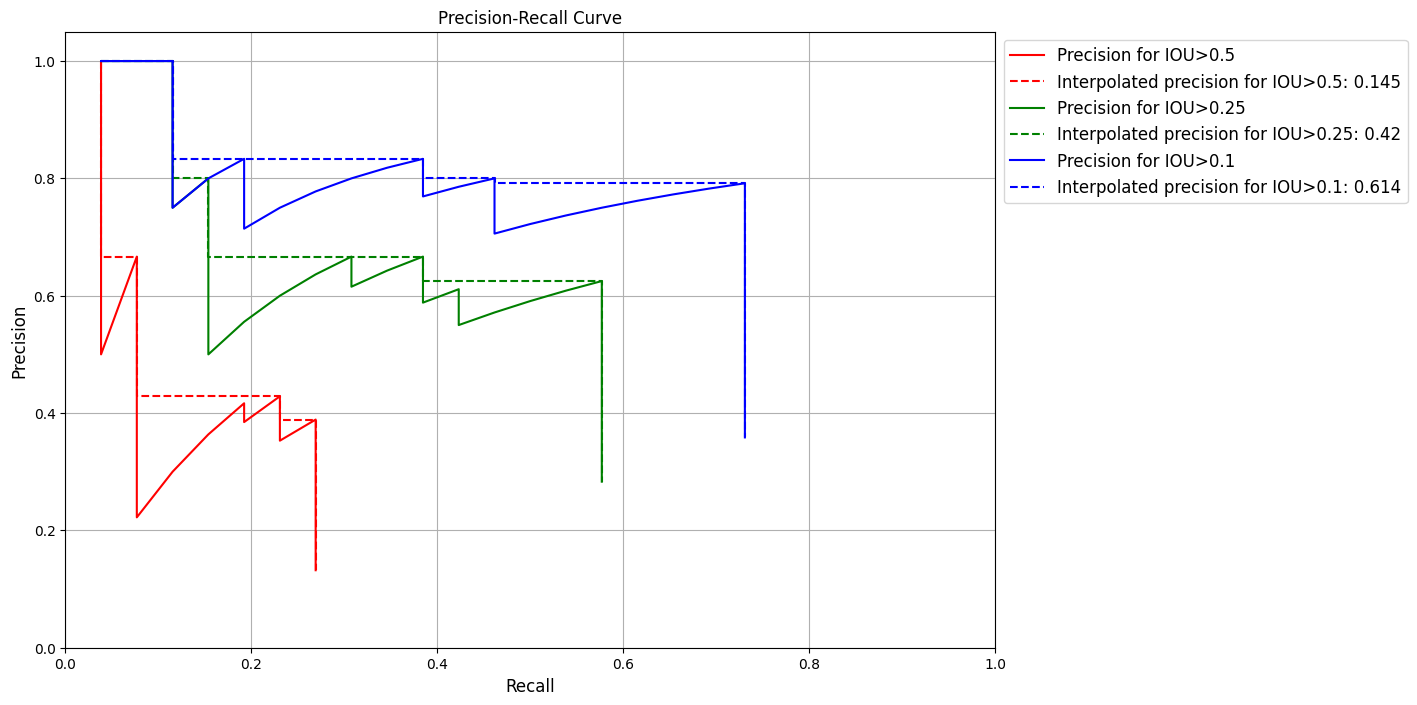

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
# Plotting the curves
plt.plot(recalls_05, precisions_05, '-r', label=f"Precision for IOU>0.5")
plt.step(recalls_05, decreasing_max_precision_05, '-r',linestyle='--', label=f"Interpolated precision for IOU>0.5: {round(ap05, 3)}")
plt.plot(recalls_025, precisions_025, '-g', label=f"Precision for IOU>0.25")
plt.step(recalls_025, decreasing_max_precision_025,  '-g',linestyle='--', label=f"Interpolated precision for IOU>0.25: {round(ap025, 3)}")
plt.plot(recalls_01, precisions_01, '-b',  label=f"Precision for IOU>0.1")
plt.step(recalls_01, decreasing_max_precision_01, '-b', linestyle='--',label=f"Interpolated precision for IOU>0.1: {round(ap01, 3)}")

plt.xlabel('Recall',fontsize = 12)
plt.ylabel('Precision',fontsize = 12)
plt.title('Precision-Recall Curve',fontsize = 12)

plt.xlim(0, 1)
plt.ylim(0, 1.05)
plt.grid(True)

# Placing legend outside the plot and increasing font size
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='large')

plt.show()


In [50]:
# import matplotlib.pyplot as plt

# # Tabular data
# experiments = [1, 2, 3, 4, 5, 6, 7, 8]
# f1_scores = [0.648, 0.289, 0.04, 0.848, 0.773, 0.729, 0.663, 0.924]
# f1_scores_quantized = [0.549, 0, 0, 0.071, 0.199, 0.614, 0.084, 0.076]

# # Plotting
# plt.figure(figsize=(12, 8))
# plt.plot(experiments, f1_scores, marker='o', color='blue', linestyle='-', linewidth=2, label='Uncompressed')
# plt.plot(experiments, f1_scores_quantized, marker='o', color='red', linestyle='-', linewidth=2, label='Quantized')
# for exp, f1 in zip(experiments, f1_scores):
#     plt.text(exp, f1, f'{f1:.3f}', color='blue', fontsize=12, ha='left', va='bottom', rotation=0,
#              bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2'))
# for exp, f1 in zip(experiments, f1_scores_quantized):
#     plt.text(exp, f1, f'{f1:.3f}', color='red', fontsize=12, ha='left', va='bottom', rotation=0,
#              bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2'))
# plt.title('Average Precision for IOU > 0.1')
# plt.xlabel('Experiment Number')
# plt.ylabel('Average Precision')
# plt.xticks(experiments)
# plt.grid(True)
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.97))
# plt.tight_layout()
# plt.show()
